In [1]:
import helper_functions as hf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# import background data
df = hf.import_csv_data("../processed_data_cardiac_arrest/Pub_PCRevents_CA.csv")
df




/home/ng.chu/nemsis_project/distribution_analysis/plot_functions.py:22: DtypeWarning: Columns (25,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


,PcrKey,eDispatch_01,eDispatch_02,eArrest_14,eArrest_01,eArrest_02,eArrest_05,eArrest_07,eArrest_11,eArrest_16,...,eTimes_03,eTimes_05,eTimes_06,eTimes_07,eTimes_09,eTimes_11,eTimes_12,eTimes_13,eDisposition_17,eDisposition_23
0,25944387,2301069,7701001,Not Recorded,3001003,7701001,7701001,7701001,7701001,7701001,...,29FEB2020:00:00:00,Not Recorded,Not Recorded,29FEB2020:00:10:00,Not Applicable,Not Recorded,Not Recorded,29FEB2020:00:33:00,7701003,7701003
1,71121582,2301063,2302001,01JAN2020:01:40:00,3001003,3002015,9923001,3007001,3011001,3016005,...,01JAN2020:02:00:29,01JAN2020:02:06:00,01JAN2020:02:35:25,01JAN2020:02:35:25,Not Applicable,Not Recorded,Not Recorded,01JAN2020:03:39:57,4217001,7701003
2,71122461,2301019,7701003,01JAN2020:01:38:32,3001003,3002005,9923001,3007001,3011001,7701003,...,01JAN2020:01:58:23,01JAN2020:01:59:08,01JAN2020:02:02:31,01JAN2020:02:04:31,01JAN2020:02:20:50,01JAN2020:02:27:34,01JAN2020:03:14:45,01JAN2020:03:20:18,4217001,9908007
3,71122902,2301007,7701003,01JAN2020:04:52:00,3001003,3002001,9923001,3007001,3011005,7701003,...,01JAN2020:04:45:10,01JAN2020:04:46:16,01JAN2020:04:53:51,01JAN2020:04:54:30,01JAN2020:05:28:30,01JAN2020:05:43:55,01JAN2020:06:18:44,01JAN2020:06:29:12,4217001,9908007
4,71123389,2301077,7701003,01JAN2020:02:00:00,3001003,3002001,9923001,3007001,3011001,7701003,...,01JAN2020:04:10:40,01JAN2020:04:14:21,01JAN2020:04:18:02,01JAN2020:04:19:00,01JAN2020:04:32:07,Not Recorded,Not Recorded,01JAN2020:04:32:07,7701003,7701001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448679,131801464,2301079,2302001,Not Recorded,3001003,3002001,7701003,3007001,3011001,3016005,...,14FEB2020:08:13:00,14FEB2020:08:16:00,14FEB2020:08:21:00,14FEB2020:08:21:00,14FEB2020:08:34:00,Not Recorded,14FEB2020:08:34:00,14FEB2020:08:34:00,7701003,7701001
448680,131801585,2301079,2302001,Not Recorded,3001003,3002001,9923003,3007005,3011001,7701003,...,06JUN2020:00:53:00,06JUN2020:00:59:00,06JUN2020:01:05:00,06JUN2020:01:05:00,06JUN2020:01:10:00,06JUN2020:01:37:00,06JUN2020:01:37:00,06JUN2020:02:52:00,4217001,9908007
448681,131801624,2301019,2302001,Not Recorded,3001003,3002001,7701003,3007001,3011001,7701003,...,02JUL2020:22:22:00,02JUL2020:22:25:00,02JUL2020:22:27:00,02JUL2020:22:28:00,02JUL2020:22:59:00,Not Recorded,02JUL2020:22:59:00,02JUL2020:22:59:00,7701003,7701001
448682,131801707,2301021,2302001,23AUG2020:19:43:00,3001005,3002001,9923001,3007003,3011007,7701003,...,23AUG2020:19:10:00,23AUG2020:19:16:00,23AUG2020:19:22:00,23AUG2020:19:24:00,23AUG2020:19:31:00,23AUG2020:20:13:00,23AUG2020:20:15:00,23AUG2020:21:36:00,4217001,9908007


In [3]:
def strip_col_str_data(series):
    """
    Function: strip the string-typed data in a Series
    Return: Series with stripped string data
    """
    return series.apply(lambda x: x.strip() if isinstance(x, str) else x)

def check_datetime_format(series, date_format='%d%b%Y:%H:%M:%S'):
    """
    Function: Check if the datetime string matches the specified format
    Return: Series with True for valid dates and False for invalid/missing dates
    """
    return series.apply(lambda x: True if isinstance(x, str) and 
                        try_parse_date(x, date_format) else False)

def try_parse_date(date_str, date_format):
    """
    Try to parse the date string with the given format
    """
    try:
        datetime.strptime(date_str, date_format)
        return True
    except ValueError:
        return False






In [4]:
# Create a name list of all time columns
time_columns = [col for col in df.columns if col.startswith('eTimes_') and col[-2:].isdigit() and 3 <= int(col[-2:]) <= 13]

# List of disposition and time data columns
selected_cols = ["PcrKey", "eDisposition_21"] + time_columns



In [5]:
# Create another DataFrame with only the selected columns
selected_df = df[selected_cols].apply(strip_col_str_data)
selected_df




,PcrKey,eDisposition_21,eTimes_03,eTimes_05,eTimes_06,eTimes_07,eTimes_09,eTimes_11,eTimes_12,eTimes_13
0,25944387,7701003,29FEB2020:00:00:00,Not Recorded,Not Recorded,29FEB2020:00:10:00,Not Applicable,Not Recorded,Not Recorded,29FEB2020:00:33:00
1,71121582,7701003,01JAN2020:02:00:29,01JAN2020:02:06:00,01JAN2020:02:35:25,01JAN2020:02:35:25,Not Applicable,Not Recorded,Not Recorded,01JAN2020:03:39:57
2,71122461,4221003,01JAN2020:01:58:23,01JAN2020:01:59:08,01JAN2020:02:02:31,01JAN2020:02:04:31,01JAN2020:02:20:50,01JAN2020:02:27:34,01JAN2020:03:14:45,01JAN2020:03:20:18
3,71122902,4221003,01JAN2020:04:45:10,01JAN2020:04:46:16,01JAN2020:04:53:51,01JAN2020:04:54:30,01JAN2020:05:28:30,01JAN2020:05:43:55,01JAN2020:06:18:44,01JAN2020:06:29:12
4,71123389,7701003,01JAN2020:04:10:40,01JAN2020:04:14:21,01JAN2020:04:18:02,01JAN2020:04:19:00,01JAN2020:04:32:07,Not Recorded,Not Recorded,01JAN2020:04:32:07
...,...,...,...,...,...,...,...,...,...,...
448679,131801464,7701003,14FEB2020:08:13:00,14FEB2020:08:16:00,14FEB2020:08:21:00,14FEB2020:08:21:00,14FEB2020:08:34:00,Not Recorded,14FEB2020:08:34:00,14FEB2020:08:34:00
448680,131801585,4221003,06JUN2020:00:53:00,06JUN2020:00:59:00,06JUN2020:01:05:00,06JUN2020:01:05:00,06JUN2020:01:10:00,06JUN2020:01:37:00,06JUN2020:01:37:00,06JUN2020:02:52:00
448681,131801624,7701003,02JUL2020:22:22:00,02JUL2020:22:25:00,02JUL2020:22:27:00,02JUL2020:22:28:00,02JUL2020:22:59:00,Not Recorded,02JUL2020:22:59:00,02JUL2020:22:59:00
448682,131801707,4221003,23AUG2020:19:10:00,23AUG2020:19:16:00,23AUG2020:19:22:00,23AUG2020:19:24:00,23AUG2020:19:31:00,23AUG2020:20:13:00,23AUG2020:20:15:00,23AUG2020:21:36:00


In [6]:
# Strip unnecessary spaces before or after
selected_df['eDisposition_21'] = selected_df['eDisposition_21'].astype(str).str.strip()
selected_df["PcrKey"] = selected_df["PcrKey"].astype(str)
selected_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448684 entries, 0 to 448683
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   PcrKey           448684 non-null  object
 1   eDisposition_21  448684 non-null  object
 2   eTimes_03        448684 non-null  object
 3   eTimes_05        448684 non-null  object
 4   eTimes_06        448684 non-null  object
 5   eTimes_07        448684 non-null  object
 6   eTimes_09        448684 non-null  object
 7   eTimes_11        448684 non-null  object
 8   eTimes_12        448684 non-null  object
 9   eTimes_13        448684 non-null  object
dtypes: object(10)
memory usage: 34.2+ MB


In [7]:
# import background data to get urbanicity of each case
background_df = hf.import_background_data()
background_df



/home/ng.chu/nemsis_project/distribution_analysis/plot_functions.py:11: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../processed_data_cardiac_arrest/test_data_region_age_gender_time_outcome.csv')


,PcrKey,USCensusRegion,USCensusDivision,NasemsoRegion,Urbanicity,Age,Gender,Race,EMSDispatchCenterTimeSec,EMSChuteTimeMin,EMSSystemResponseTimeMin,EMSSceneResponseTimeMin,EMSSceneTimeMin,EMSSceneToPatientTimeMin,EMSTransportTimeMin,EMSTotalCallTimeMin,ROSC,EndOfEMS,EMD_Disposition,Hospital_Disposition
0,25944387,NaN,NaN,NaN,NaN,NaN,9906003,2514011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,7701003,7701001,7701003,7701003
1,71121582,South,East South Central,South,Rural,23,9906003,2514005,11,5.516666667,34.93333333,29.41666667,NaN,0,NaN,99.46666667,3012001,3018003,7701003,7701003
2,71122461,South,East South Central,South,Urban,120,9906003,2514005,0,0.75,4.133333333,3.383333333,18.31666667,2,6.733333333,81.91666667,3012007,3018005,7701003,7701003
3,71122902,South,East South Central,South,Urban,63,9906001,7701003,0,1.1,8.683333333,7.583333333,34.65,0.65,15.41666667,104.0333333,3012005,3018001,7701003,7701003
4,71123389,South,East South Central,South,Urban,92,9906001,7701003,114,3.683333333,7.366666667,3.683333333,14.08333333,0.966666667,NaN,21.45,3012001,3018003,7701003,7701003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448679,131801464,Midwest,East North Central,Great Lakes,Urban,57,9906001,7701003,0,3,8,5,13,0,NaN,21,3012001,3018003,7701003,7701003
448680,131801585,Midwest,East North Central,Great Lakes,Urban,61,9906003,7701003,0,6,12,6,5,0,27,119,3012001,3018005,7701003,7701003
448681,131801624,Midwest,East North Central,Great Lakes,Urban,92,9906003,7701003,0,3,5,2,32,1,NaN,37,3012001,3018003,7701003,7701003
448682,131801707,Midwest,East North Central,Great Lakes,Urban,85,9906001,NaN,0,6,12,6,9,2,42,146,3012001,3018001,7701003,7701003


In [8]:
# Convert type for PcrKey and strip unnecessary spaces
background_df["PcrKey"] = background_df["PcrKey"].astype(str)
background_df = background_df.apply(strip_col_str_data)





In [9]:
# Line Block
# Start looking for missing values for all background data and outcome indicators




In [10]:
merged_df = selected_df.merge(background_df, on="PcrKey", how="inner")
merged_df





,PcrKey,eDisposition_21,eTimes_03,eTimes_05,eTimes_06,eTimes_07,eTimes_09,eTimes_11,eTimes_12,eTimes_13,...,EMSSystemResponseTimeMin,EMSSceneResponseTimeMin,EMSSceneTimeMin,EMSSceneToPatientTimeMin,EMSTransportTimeMin,EMSTotalCallTimeMin,ROSC,EndOfEMS,EMD_Disposition,Hospital_Disposition
0,25944387,7701003,29FEB2020:00:00:00,Not Recorded,Not Recorded,29FEB2020:00:10:00,Not Applicable,Not Recorded,Not Recorded,29FEB2020:00:33:00,...,NaN,NaN,NaN,NaN,NaN,33,7701003,7701001,7701003,7701003
1,71121582,7701003,01JAN2020:02:00:29,01JAN2020:02:06:00,01JAN2020:02:35:25,01JAN2020:02:35:25,Not Applicable,Not Recorded,Not Recorded,01JAN2020:03:39:57,...,34.93333333,29.41666667,NaN,0,NaN,99.46666667,3012001,3018003,7701003,7701003
2,71122461,4221003,01JAN2020:01:58:23,01JAN2020:01:59:08,01JAN2020:02:02:31,01JAN2020:02:04:31,01JAN2020:02:20:50,01JAN2020:02:27:34,01JAN2020:03:14:45,01JAN2020:03:20:18,...,4.133333333,3.383333333,18.31666667,2,6.733333333,81.91666667,3012007,3018005,7701003,7701003
3,71122902,4221003,01JAN2020:04:45:10,01JAN2020:04:46:16,01JAN2020:04:53:51,01JAN2020:04:54:30,01JAN2020:05:28:30,01JAN2020:05:43:55,01JAN2020:06:18:44,01JAN2020:06:29:12,...,8.683333333,7.583333333,34.65,0.65,15.41666667,104.0333333,3012005,3018001,7701003,7701003
4,71123389,7701003,01JAN2020:04:10:40,01JAN2020:04:14:21,01JAN2020:04:18:02,01JAN2020:04:19:00,01JAN2020:04:32:07,Not Recorded,Not Recorded,01JAN2020:04:32:07,...,7.366666667,3.683333333,14.08333333,0.966666667,NaN,21.45,3012001,3018003,7701003,7701003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448679,131801464,7701003,14FEB2020:08:13:00,14FEB2020:08:16:00,14FEB2020:08:21:00,14FEB2020:08:21:00,14FEB2020:08:34:00,Not Recorded,14FEB2020:08:34:00,14FEB2020:08:34:00,...,8,5,13,0,NaN,21,3012001,3018003,7701003,7701003
448680,131801585,4221003,06JUN2020:00:53:00,06JUN2020:00:59:00,06JUN2020:01:05:00,06JUN2020:01:05:00,06JUN2020:01:10:00,06JUN2020:01:37:00,06JUN2020:01:37:00,06JUN2020:02:52:00,...,12,6,5,0,27,119,3012001,3018005,7701003,7701003
448681,131801624,7701003,02JUL2020:22:22:00,02JUL2020:22:25:00,02JUL2020:22:27:00,02JUL2020:22:28:00,02JUL2020:22:59:00,Not Recorded,02JUL2020:22:59:00,02JUL2020:22:59:00,...,5,2,32,1,NaN,37,3012001,3018003,7701003,7701003
448682,131801707,4221003,23AUG2020:19:10:00,23AUG2020:19:16:00,23AUG2020:19:22:00,23AUG2020:19:24:00,23AUG2020:19:31:00,23AUG2020:20:13:00,23AUG2020:20:15:00,23AUG2020:21:36:00,...,12,6,9,2,42,146,3012001,3018001,7701003,7701003


In [ ]:
# Convert Gender and End Event columns into strings
cols_to_convert = ["Gender", "EndOfEMS"]
merged_df[cols_to_convert] = merged_df[cols_to_convert].astype(str)



In [11]:
# filter / drop unnecessary columns and make the df ready
eTimes_columns = merged_df.filter(regex='^eTimes_')
merged_df.drop(columns = eTimes_columns, inplace = True)
merged_df.drop(columns = ["EMD_Disposition", "Hospital_Disposition"], inplace = True)
merged_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448684 entries, 0 to 448683
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   PcrKey                    448684 non-null  object
 1   eDisposition_21           448684 non-null  object
 2   USCensusRegion            448140 non-null  object
 3   USCensusDivision          448140 non-null  object
 4   NasemsoRegion             448140 non-null  object
 5   Urbanicity                435746 non-null  object
 6   Age                       439910 non-null  object
 7   Gender                    448684 non-null  object
 8   Race                      366914 non-null  object
 9   EMSDispatchCenterTimeSec  330505 non-null  object
 10  EMSChuteTimeMin           443010 non-null  object
 11  EMSSystemResponseTimeMin  446144 non-null  object
 12  EMSSceneResponseTimeMin   445528 non-null  object
 13  EMSSceneTimeMin           244279 non-null  object
 14  EMSS

In [12]:
# Splitting the merged data into two groups
no_dispos_bg_df = merged_df[merged_df['eDisposition_21'].str.startswith('7')] # no disposition
has_dispos_bg_df = merged_df[~merged_df['eDisposition_21'].str.startswith('7')] # has disposition





In [13]:
# Review the separated df
has_dispos_bg_df.head()



,PcrKey,eDisposition_21,USCensusRegion,USCensusDivision,NasemsoRegion,Urbanicity,Age,Gender,Race,EMSDispatchCenterTimeSec,EMSChuteTimeMin,EMSSystemResponseTimeMin,EMSSceneResponseTimeMin,EMSSceneTimeMin,EMSSceneToPatientTimeMin,EMSTransportTimeMin,EMSTotalCallTimeMin,ROSC,EndOfEMS
2,71122461,4221003,South,East South Central,South,Urban,120,9906003,2514005,0,0.75,4.133333333,3.383333333,18.31666667,2,6.733333333,81.91666667,3012007,3018005
3,71122902,4221003,South,East South Central,South,Urban,63,9906001,7701003,0,1.1,8.683333333,7.583333333,34.65,0.65,15.41666667,104.0333333,3012005,3018001
6,71145732,4221003,Northeast,New England,East,Urban,72,9906003,2514005,120,1,13,12,41,1,19,97,7701003,3018007
8,71146549,4221003,Northeast,New England,East,Urban,43,9906003,NaN,NaN,2.583333333,3.383333333,0.8,9.683333333,0.683333333,8,21.76666667,3012001,3018005
11,71147416,4221003,South,South Atlantic,East,Urban,25,9906001,2514011,NaN,2,4,2,21,1,2,108,3012001,3018001


In [14]:
# Calculate counts and percentages
total_count = len(df)
no_dispos_count = len(no_dispos_bg_df)
has_dispos_count = len(has_dispos_bg_df)

no_dispos_percentage = (no_dispos_count / total_count) * 100
has_dispos_percentage = (has_dispos_count / total_count) * 100

print("-----")
print("no_dispos_count:", no_dispos_count)
print("no_dispos_percentage:", no_dispos_percentage)
print("-----")
print("has_dispos_count:", has_dispos_count)
print("has_dispos_percentage:", has_dispos_percentage)
print("-----")



-----
no_dispos_count: 225137
no_dispos_percentage: 50.17718483386972
-----
has_dispos_count: 223547
has_dispos_percentage: 49.82281516613028
-----


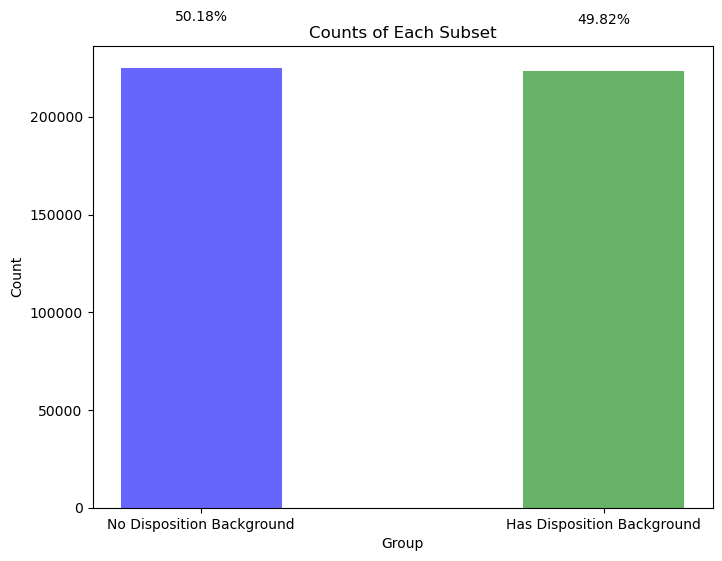

In [58]:
# Plot the subset sizes

# Organize data into lists for plotting
counts = [no_dispos_count, has_dispos_count]
percentages = [no_dispos_percentage, has_dispos_percentage]
groups = ['No Disposition Background', 'Has Disposition Background']
colors = ['blue', 'green']

# Plotting the histogram
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting counts
ax.bar(groups, counts, color=colors, width=0.4, align='center', alpha=0.6)
ax.set_xlabel('Group')
ax.set_ylabel('Count')
ax.set_title('Counts of Each Subset')

# Adding percentages as text labels
for i, (pct, count) in enumerate(zip(percentages, counts)):
    ax.text(i, count + 0.05 * total_count, f'{pct:.2f}%', ha='center', va='bottom')

plt.show()




In [ ]:
# Calculate NaN values for eTimes_ columns in below code blocks




In [18]:
# Find the missing value in merged_df in the combined version
print("Overall - Percentage of Missing Values for all data:\n", calculate_nan_percentage(merged_df))





Overall - Percentage of Missing Values for all data:
 PcrKey                       0.000000
eDisposition_21             50.177185
USCensusRegion               0.121243
USCensusDivision             0.121243
NasemsoRegion                0.121243
Urbanicity                   2.883544
Age                          1.955497
Gender                       0.905314
Race                        43.486507
EMSDispatchCenterTimeSec    26.339027
EMSChuteTimeMin              1.264587
EMSSystemResponseTimeMin     0.566100
EMSSceneResponseTimeMin      0.703390
EMSSceneTimeMin             45.556561
EMSSceneToPatientTimeMin     5.952296
EMSTransportTimeMin         58.215804
EMSTotalCallTimeMin          0.218862
ROSC                         5.542654
EndOfEMS                    11.453272
dtype: float64


In [15]:
# Calculate NaN values in eTimes
def calculate_nan_percentage(df):
    # Replace 'Not Recorded', 'Not Applicable', '7701001', '7701003' with np.nan for calculation
    df_replaced = df.replace('Not Recorded', np.nan)
    df_replaced = df_replaced.replace('Not Applicable', np.nan)
    df_replaced = df_replaced.replace('7701001', np.nan)
    df_replaced = df_replaced.replace('7701003', np.nan)
    return df_replaced.isna().mean() * 100

# Calculate percentages for both groups
no_dispos_missing_val_percent_group = calculate_nan_percentage(no_dispos_bg_df)
has_dispos_missing_val_percent_group = calculate_nan_percentage(has_dispos_bg_df)

print("Percentage of 'Not Recorded' in Group 1:\n", no_dispos_missing_val_percent_group)
print("-----")
print("Percentage of 'Not Recorded' in Group 2:\n", has_dispos_missing_val_percent_group)




Percentage of 'Not Recorded' in Group 1:
 PcrKey                        0.000000
eDisposition_21             100.000000
USCensusRegion                0.033313
USCensusDivision              0.033313
NasemsoRegion                 0.033313
Urbanicity                    2.580207
Age                           2.821393
Gender                        1.496422
Race                         43.464202
EMSDispatchCenterTimeSec     25.728334
EMSChuteTimeMin               1.039367
EMSSystemResponseTimeMin      0.728001
EMSSceneResponseTimeMin       0.898120
EMSSceneTimeMin              75.709457
EMSSceneToPatientTimeMin      6.662610
EMSTransportTimeMin          98.144685
EMSTotalCallTimeMin           0.238077
ROSC                          7.542074
EndOfEMS                     12.551913
dtype: float64
Percentage of 'Not Recorded' in Group 2:
 PcrKey                       0.000000
eDisposition_21              0.000000
USCensusRegion               0.209799
USCensusDivision             0.209799
NasemsoR

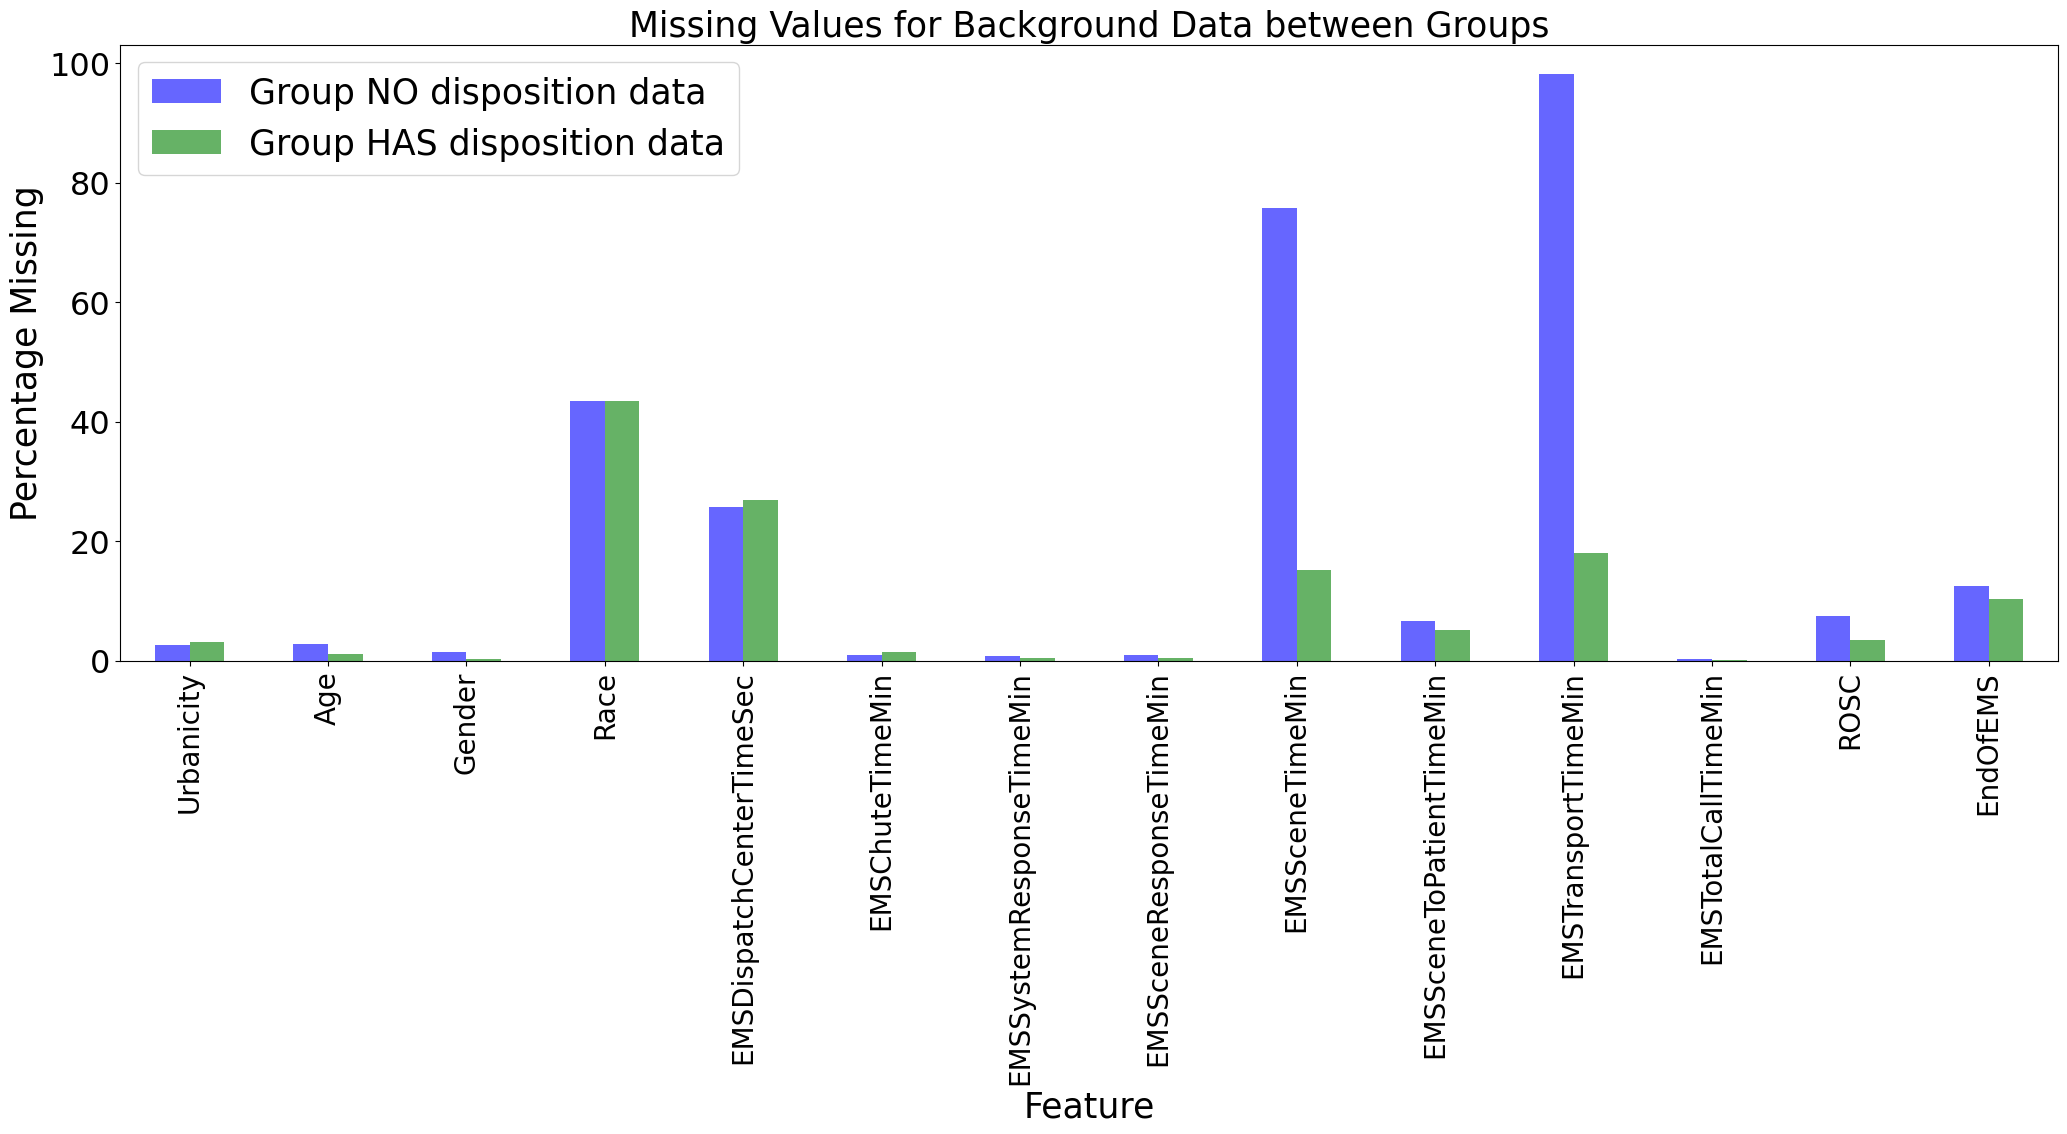

In [83]:
# Plot missing percentages for core columns

# import matplotlib.pyplot as plt
# import pandas as pd

excluded_cols = ["PcrKey", "eDisposition_21", "USCensusRegion", "USCensusDivision", "NasemsoRegion"]

# Convert to DataFrame of missing values for background data
bg_df = pd.DataFrame({'Group NO disposition data': no_dispos_missing_val_percent_group, 'Group HAS disposition data': has_dispos_missing_val_percent_group})
bg_df.drop(labels=excluded_cols, inplace=True)

# Create a figure and an axis object
fig, ax = plt.subplots(figsize=(25, 8))

# Plot using the axis object
bg_df.plot(kind='bar', ax=ax, color=['blue', 'green'], alpha=0.6)

# Set title and labels with increased font size
ax.set_ylabel("Percentage Missing", fontsize=25)  # Increase label font size
ax.set_xlabel("Feature", fontsize=25)             # Increase label font size
ax.set_title("Missing Values for Background Data between Groups", fontsize=25)  # Increase title font size
ax.legend(loc='best', fontsize=25)          # Increase legend font size

plt.xticks(fontsize=20)   # Increase x-axis tick font size
plt.yticks(fontsize=23)   # Increase y-axis tick font size

plt.show()





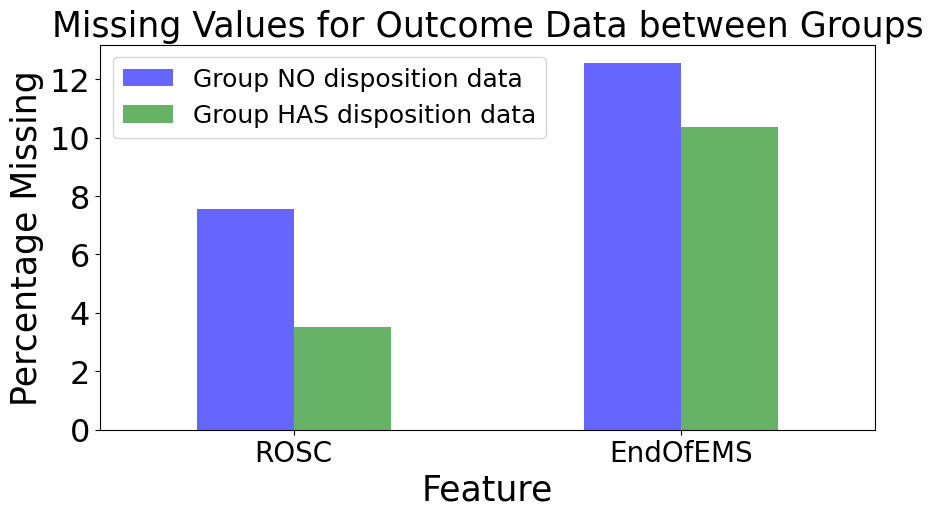

In [84]:
# Plot specifically missing percentages for columns of outcome indicators

outcome_cols = ["ROSC", "EndOfEMS"]
outcome_df = bg_df.loc[outcome_cols, :]

# Create a figure and an axis object
fig, ax = plt.subplots(figsize=(10, 5))

# Plot using the axis object
outcome_df.plot(kind='bar', ax=ax, color=['blue', 'green'], alpha=0.6)

# Set title and labels with increased font size
ax.set_ylabel("Percentage Missing", fontsize=25)
ax.set_xlabel("Feature", fontsize=25)
ax.set_title("Missing Values for Outcome Data between Groups", fontsize=25)
ax.legend(loc='best', fontsize=18)

plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=23)

plt.show()




In [20]:
# Extract keys from both groups
no_disposition_key_df = no_dispos_bg_df[["PcrKey"]]
has_disposition_key_df = has_dispos_bg_df[["PcrKey"]]
no_disposition_key_df.to_csv("../clustering_data/keys_no_disposition_data.csv", index=False)
has_disposition_key_df.to_csv("../clustering_data/keys_has_disposition_data.csv", index=False)




In [21]:
# Line Block
# Epinephrine Missing Values Exploration





In [22]:
# import csv with epinephrine data
epinephrine_df = hf.import_csv_data("epinephrine_cols.csv")
epinephrine_df = epinephrine_df[["PcrKey", "EpinephrineUsed"]]
epinephrine_df["PcrKey"] = epinephrine_df["PcrKey"].astype(str)
epinephrine_df



,PcrKey,EpinephrineUsed
0,71122461,1
1,71122902,1
2,71145732,0
3,71146549,0
4,71147389,0
...,...,...
263729,121384546,0
263730,122320784,0
263731,122842002,0
263732,123095806,0


In [23]:
no_disposition_epinephrine_df = no_disposition_key_df.merge(epinephrine_df, on="PcrKey", how="inner")
has_disposition_epinephrine_df = has_disposition_key_df.merge(epinephrine_df, on="PcrKey", how="inner")




In [24]:
# Replace 'epinephrineUsed' values with np.nan where it's 0 or missing
no_disposition_epinephrine_df['EpinephrineUsed'] = no_disposition_epinephrine_df['EpinephrineUsed'].replace(0, np.nan)
has_disposition_epinephrine_df['EpinephrineUsed'] = has_disposition_epinephrine_df['EpinephrineUsed'].replace(0, np.nan)




In [25]:
# Calculate NaN values
def calculate_nan_percentage(df):

    return df_replaced.isna().mean() * 100

# Calculate percentages for both groups
no_dispos_epinephrine_percent = (1 - no_disposition_epinephrine_df.isna().mean()) * 100
has_dispos_epinephrine_percent = (1 - has_disposition_epinephrine_df.isna().mean()) * 100

print("Percentage of 'Not Recorded' in Group 1:\n", no_dispos_epinephrine_percent)
print("-----")
print("Percentage of 'Not Recorded' in Group 2:\n", has_dispos_epinephrine_percent)




Percentage of 'Not Recorded' in Group 1:
 PcrKey             100.000000
EpinephrineUsed     29.060465
dtype: float64
Percentage of 'Not Recorded' in Group 2:
 PcrKey             100.000000
EpinephrineUsed     23.798912
dtype: float64


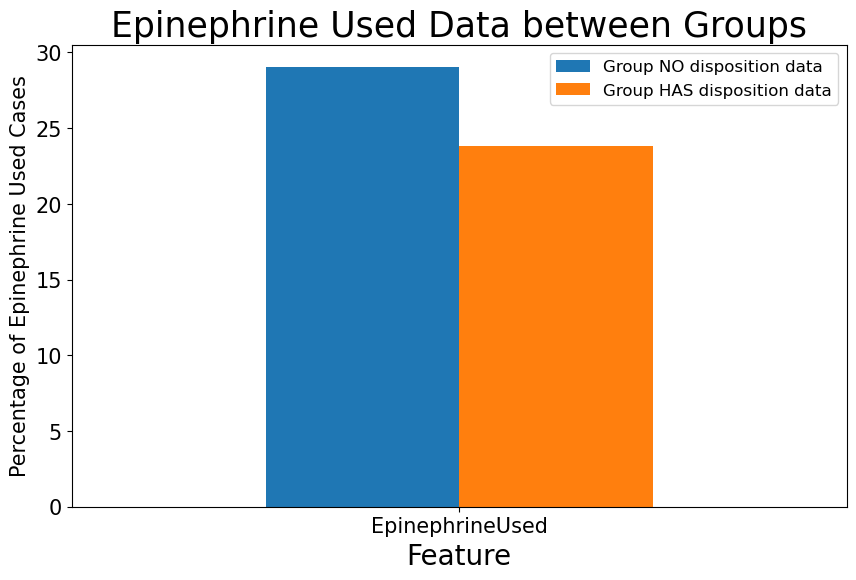

In [26]:
# Plot specifically missing percentages for EpinephrineUsed columns

# import matplotlib.pyplot as plt
# import pandas as pd

# Convert to DataFrame of missing values for background data
epinephrine_plot_df = pd.DataFrame({'Group NO disposition data': no_dispos_epinephrine_percent, 'Group HAS disposition data': has_dispos_epinephrine_percent})
epinephrine_plot_df.drop(labels = ["PcrKey"], inplace = True)

# Create a figure and an axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot using the axis object
epinephrine_plot_df.plot(kind='bar', ax=ax)

# Set title and labels with increased font size
ax.set_ylabel("Percentage of Epinephrine Used Cases", fontsize=15)  # Increase label font size
ax.set_xlabel("Feature", fontsize=20)             # Increase label font size
ax.set_title("Epinephrine Used Data between Groups", fontsize=25)  # Increase title font size
ax.legend(loc='best', fontsize=12)          # Increase legend font size

plt.xticks(fontsize=15, rotation=0)   # Increase x-axis tick font size
plt.yticks(fontsize=15)   # Increase y-axis tick font size

plt.show()





In [27]:
# Separation line
# Below is the previous part focusing on Urbanicity x eTimes data between two groups





In [28]:
# Select feature cols
col_needed = ["PcrKey", "Urbanicity", "EndOfEMS"]
urbanicity_df = background_df[col_needed]

urbanicity_df["PcrKey"] = urbanicity_df["PcrKey"].astype(str)
urbanicity_df = urbanicity_df.apply(strip_col_str_data)

urbanicity_df






/tmp/ipykernel_23458/3499454746.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urbanicity_df["PcrKey"] = urbanicity_df["PcrKey"].astype(str)


,PcrKey,Urbanicity,EndOfEMS
0,25944387,NaN,7701001
1,71121582,Rural,3018003
2,71122461,Urban,3018005
3,71122902,Urban,3018001
4,71123389,Urban,3018003
...,...,...,...
448679,131801464,Urban,3018003
448680,131801585,Urban,3018005
448681,131801624,Urban,3018003
448682,131801707,Urban,3018001


In [29]:
dict(urbanicity_df["Urbanicity"].value_counts())



{'Urban': 369051, 'Rural': 32009, 'Suburban': 26519, 'Wilderness': 8167}

In [30]:
selected_time_df = selected_df.merge(urbanicity_df, on="PcrKey", how="inner")
selected_time_df



,PcrKey,eDisposition_21,eTimes_03,eTimes_05,eTimes_06,eTimes_07,eTimes_09,eTimes_11,eTimes_12,eTimes_13,Urbanicity,EndOfEMS
0,25944387,7701003,29FEB2020:00:00:00,Not Recorded,Not Recorded,29FEB2020:00:10:00,Not Applicable,Not Recorded,Not Recorded,29FEB2020:00:33:00,NaN,7701001
1,71121582,7701003,01JAN2020:02:00:29,01JAN2020:02:06:00,01JAN2020:02:35:25,01JAN2020:02:35:25,Not Applicable,Not Recorded,Not Recorded,01JAN2020:03:39:57,Rural,3018003
2,71122461,4221003,01JAN2020:01:58:23,01JAN2020:01:59:08,01JAN2020:02:02:31,01JAN2020:02:04:31,01JAN2020:02:20:50,01JAN2020:02:27:34,01JAN2020:03:14:45,01JAN2020:03:20:18,Urban,3018005
3,71122902,4221003,01JAN2020:04:45:10,01JAN2020:04:46:16,01JAN2020:04:53:51,01JAN2020:04:54:30,01JAN2020:05:28:30,01JAN2020:05:43:55,01JAN2020:06:18:44,01JAN2020:06:29:12,Urban,3018001
4,71123389,7701003,01JAN2020:04:10:40,01JAN2020:04:14:21,01JAN2020:04:18:02,01JAN2020:04:19:00,01JAN2020:04:32:07,Not Recorded,Not Recorded,01JAN2020:04:32:07,Urban,3018003
...,...,...,...,...,...,...,...,...,...,...,...,...
448679,131801464,7701003,14FEB2020:08:13:00,14FEB2020:08:16:00,14FEB2020:08:21:00,14FEB2020:08:21:00,14FEB2020:08:34:00,Not Recorded,14FEB2020:08:34:00,14FEB2020:08:34:00,Urban,3018003
448680,131801585,4221003,06JUN2020:00:53:00,06JUN2020:00:59:00,06JUN2020:01:05:00,06JUN2020:01:05:00,06JUN2020:01:10:00,06JUN2020:01:37:00,06JUN2020:01:37:00,06JUN2020:02:52:00,Urban,3018005
448681,131801624,7701003,02JUL2020:22:22:00,02JUL2020:22:25:00,02JUL2020:22:27:00,02JUL2020:22:28:00,02JUL2020:22:59:00,Not Recorded,02JUL2020:22:59:00,02JUL2020:22:59:00,Urban,3018003
448682,131801707,4221003,23AUG2020:19:10:00,23AUG2020:19:16:00,23AUG2020:19:22:00,23AUG2020:19:24:00,23AUG2020:19:31:00,23AUG2020:20:13:00,23AUG2020:20:15:00,23AUG2020:21:36:00,Urban,3018001


In [31]:
# Splitting the data into two groups
no_disposition_data_df = selected_time_df[selected_time_df['eDisposition_21'].str.startswith('7')] # no disposition
has_disposition_data_df = selected_time_df[~selected_time_df['eDisposition_21'].str.startswith('7')] # has disposition





In [32]:
# Convert data type for outcome column
no_disposition_data_df["EndOfEMS"] = no_disposition_data_df["EndOfEMS"].astype(str)
has_disposition_data_df["EndOfEMS"] = has_disposition_data_df["EndOfEMS"].astype(str)
has_disposition_data_df.info()




<class 'pandas.core.frame.DataFrame'>
Index: 223547 entries, 2 to 448683
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   PcrKey           223547 non-null  object
 1   eDisposition_21  223547 non-null  object
 2   eTimes_03        223547 non-null  object
 3   eTimes_05        223547 non-null  object
 4   eTimes_06        223547 non-null  object
 5   eTimes_07        223547 non-null  object
 6   eTimes_09        223547 non-null  object
 7   eTimes_11        223547 non-null  object
 8   eTimes_12        223547 non-null  object
 9   eTimes_13        223547 non-null  object
 10  Urbanicity       216418 non-null  object
 11  EndOfEMS         223547 non-null  object
dtypes: object(12)
memory usage: 22.2+ MB


/tmp/ipykernel_23458/3387394511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_disposition_data_df["EndOfEMS"] = has_disposition_data_df["EndOfEMS"].astype(str)


In [36]:
# Review the size of subsets
has_disposition_data_df.shape[0]


223547

In [33]:
# Check the 'Not Recorded' answer in the column(s)
dict(has_disposition_data_df["eTimes_11"].value_counts())['Not Recorded']



34071

In [35]:
# Check percentages for each answer in the outcome column
no_disposition_data_df["EndOfEMS"].value_counts(dropna=False, normalize=True)



EndOfEMS
3018003    0.818559
7701003    0.105389
7701001    0.020130
3018001    0.019322
3018005    0.017163
3018007    0.010300
3018011    0.005628
3018009    0.003509
Name: proportion, dtype: float64

In [38]:
# Converting EndOfEMS to string type for comparison
# has_disposition_data_df['EndOfEMS'] = has_disposition_data_df['EndOfEMS'].astype(str)

# Defining the death codes
death_codes = ['3018001', '3018003']

def calculate_mortality_rate(df, urbanicity, death_codes):
    total_cases = df[df['Urbanicity'] == urbanicity].shape[0]
    if total_cases > 0:
        death_cases = df[(df['Urbanicity'] == urbanicity) & (df['EndOfEMS'].isin(death_codes))].shape[0]
        return death_cases / total_cases * 100
    else:
        return None





In [39]:
# Calculating mortality rates for urban and rural areas in Group 1
urban_mortality_1 = calculate_mortality_rate(no_disposition_data_df, 'Urban', death_codes)
rural_mortality_1 = calculate_mortality_rate(no_disposition_data_df, 'Rural', death_codes)

print("Urban Mortality Rate (%) in group - NO disposition data:", urban_mortality_1)
print("Rural Mortality Rate (%) in group - NO disposition data:", rural_mortality_1)







Urban Mortality Rate (%) in group - NO disposition data: 84.11804194301979
Rural Mortality Rate (%) in group - NO disposition data: 82.76807980049875


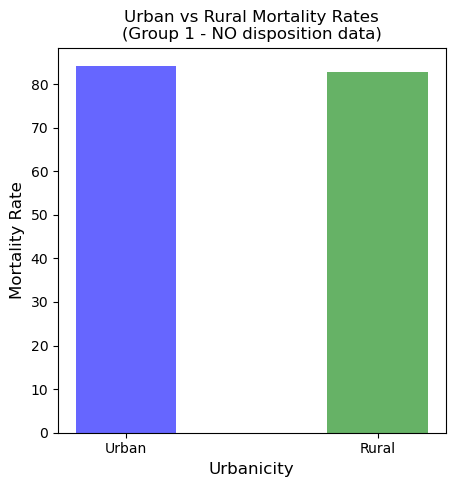

In [73]:
# Bar plot of urban and rural areas in Group 1 - NO disposition data for the mortality

# Plotting the histogram
fig, ax = plt.subplots(figsize=(5, 5))

x1 = ['Urban', 'Rural']
y1 = [urban_mortality_1, rural_mortality_1]
colors = ['blue', 'green']

plt.bar(x1, y1, color=colors, width=0.4, align='center', alpha=0.6)
plt.xlabel('Urbanicity', fontsize=12)
plt.ylabel('Mortality Rate', fontsize=12)
plt.title('Urban vs Rural Mortality Rates\n(Group 1 - NO disposition data)')

plt.show()





In [41]:
# Calculating mortality rates for urban and rural areas in Group 2
urban_mortality_2 = calculate_mortality_rate(has_disposition_data_df, 'Urban', death_codes)
rural_mortality_2 = calculate_mortality_rate(has_disposition_data_df, 'Rural', death_codes)

print("Urban Mortality Rate (%) in group with disposition data:", urban_mortality_2)
print("Rural Mortality Rate (%) in group with disposition data:", rural_mortality_2)





Urban Mortality Rate (%) in group with disposition data: 31.961869551425792
Rural Mortality Rate (%) in group with disposition data: 41.549251675120544


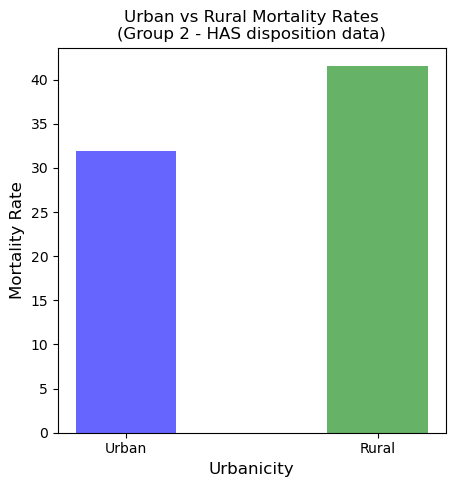

In [75]:
# Bar plot of urban and rural areas in Group 2 - HAS disposition data for the mortality

# Plotting the histogram
fig, ax = plt.subplots(figsize=(5, 5))

x2 = ['Urban', 'Rural']
y2 = [urban_mortality_2, rural_mortality_2]
colors = ['blue', 'green']

plt.bar(x2, y2, color=colors, width=0.4, align='center', alpha=0.6)
plt.xlabel('Urbanicity', fontsize=12)
plt.ylabel('Mortality Rate', fontsize=12)
plt.title('Urban vs Rural Mortality Rates\n(Group 2 - HAS disposition data)')

plt.show()





In [49]:
no_dispos_bg_df





,PcrKey,eDisposition_21,USCensusRegion,USCensusDivision,NasemsoRegion,Urbanicity,Age,Gender,Race,EMSDispatchCenterTimeSec,EMSChuteTimeMin,EMSSystemResponseTimeMin,EMSSceneResponseTimeMin,EMSSceneTimeMin,EMSSceneToPatientTimeMin,EMSTransportTimeMin,EMSTotalCallTimeMin,ROSC,EndOfEMS
0,25944387,7701003,NaN,NaN,NaN,NaN,NaN,9906003,2514011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,7701003,7701001
1,71121582,7701003,South,East South Central,South,Rural,23,9906003,2514005,11,5.516666667,34.93333333,29.41666667,NaN,0,NaN,99.46666667,3012001,3018003
4,71123389,7701003,South,East South Central,South,Urban,92,9906001,7701003,114,3.683333333,7.366666667,3.683333333,14.08333333,0.966666667,NaN,21.45,3012001,3018003
5,71124833,7701003,South,West South Central,South,Urban,48,9906001,7701003,NaN,0.016666667,9.133333333,9.116666667,NaN,1.566666667,NaN,58.88333333,3012001,3018003
7,71146169,7701001,Northeast,New England,East,Urban,29,9906003,7701003,60,0,3,3,NaN,1,NaN,35,7701003,3018003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448672,131658521,7701001,Northeast,Middle Atlantic,East,Urban,33,9906001,7701003,NaN,3,7,4,58,1,NaN,99,3012007,3018007
448673,131659489,7701001,Northeast,Middle Atlantic,East,Urban,70,9906003,7701003,NaN,4,5,1,40,1,NaN,45,7701003,3018003
448676,131775485,7701003,South,West South Central,South,Urban,54,9906001,NaN,180,0,10,10,NaN,NaN,NaN,99,7701003,7701003
448679,131801464,7701003,Midwest,East North Central,Great Lakes,Urban,57,9906001,7701003,0,3,8,5,13,0,NaN,21,3012001,3018003


In [51]:
# Calculate NaN values in eTimes
def calculate_not_recorded_percentage(df):
    # Replace 'Not Recorded' with np.nan for calculation
    df_replaced = df.replace('Not Recorded', np.nan)
    df_replaced_2 = df_replaced.replace('Not Applicable', np.nan)
    return df_replaced_2.isna().mean() * 100

# Calculate percentages for both groups
not_recorded_percentage_group1 = calculate_not_recorded_percentage(no_disposition_data_df.filter(like='eTimes'))
not_recorded_percentage_group2 = calculate_not_recorded_percentage(has_disposition_data_df.filter(like='eTimes'))

print("Percentage of 'Not Recorded' in Group 1:\n", not_recorded_percentage_group1)
print("Percentage of 'Not Recorded' in Group 2:\n", not_recorded_percentage_group2)






Percentage of 'Not Recorded' in Group 1:
 eTimes_03     0.000000
eTimes_05     0.381545
eTimes_06     0.650715
eTimes_07     6.086516
eTimes_09    75.683695
eTimes_11    98.072729
eTimes_12    95.682629
eTimes_13     0.002221
dtype: float64
Percentage of 'Not Recorded' in Group 2:
 eTimes_03     0.000000
eTimes_05     0.236639
eTimes_06     0.305529
eTimes_07     4.818673
eTimes_09    15.146703
eTimes_11    17.787758
eTimes_12    38.349877
eTimes_13     0.001789
dtype: float64


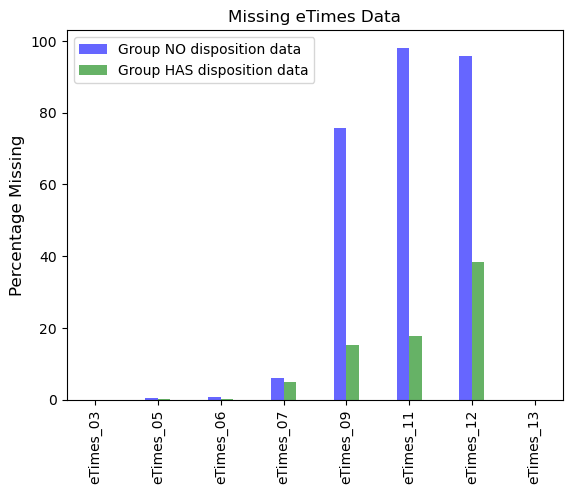

In [80]:
# Convert to DataFrame  
time_df = pd.DataFrame({'Group NO disposition data': not_recorded_percentage_group1, 'Group HAS disposition data': not_recorded_percentage_group2})
colors = ['blue', 'green']

# Plot 
ax = time_df.plot(kind='bar', color=colors, width=0.4, align='center', alpha=0.6)
ax.set_title("Missing eTimes Data")
ax.set_ylabel("Percentage Missing", fontsize=12)
ax.legend(loc='upper left')

plt.show()



